In [305]:
from scripts.load_data import load_data

In [367]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to multiple lines
pd.set_option('display.max_rows', None)  # Show all rows

In [406]:
data_path = "data/"

In [407]:
df = load_data(data_path)

2023-05-07 12:20:51,523 - INFO - Found 4 .xlsx files in data
2023-05-07 12:20:51,525 - INFO - Reading data/2020-v184-24042023-EU MRV Publication of information.xlsx
/Users/emmanuelsekyi/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
2023-05-07 12:20:59,040 - INFO - Reading data/2018-v268-06102022-EU MRV Publication of information.xlsx
/Users/emmanuelsekyi/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
2023-05-07 12:21:07,489 - INFO - Reading data/2019-v213-24042023-EU MRV Publication of information.xlsx
/Users/emmanuelsekyi/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, app

In [408]:
df.columns

Index(['IMO Number', 'Name', 'Ship type', 'Reporting Period',
       'Technical efficiency', 'Port of Registry', 'Home Port', 'Ice Class',
       'DoC issue date', 'DoC expiry date', 'Verifier Number', 'Verifier Name',
       'Verifier NAB', 'Verifier Address', 'Verifier City',
       'Verifier Accreditation number', 'Verifier Country', 'A', 'B', 'C', 'D',
       'Total fuel consumption [m tonnes]',
       'Fuel consumptions assigned to On laden [m tonnes]',
       'Total CO₂ emissions [m tonnes]',
       'CO₂ emissions from all voyages between ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions from all voyages which departed from ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions from all voyages to ports under a MS jurisdiction [m tonnes]',
       'CO₂ emissions which occurred within ports under a MS jurisdiction at berth [m tonnes]',
       'CO₂ emissions assigned to Passenger transport [m tonnes]',
       'CO₂ emissions assigned to Freight transport [m t

In [409]:
len(df.columns)

63

#### **Columns with null values**

In [410]:
from scripts.preprocessing import missing_percentage_dataframe,sort_by_missing_percentage,drop_columns_above_threshold,extract_technical_efficiency_value

In [411]:
missing_percentage_df = missing_percentage_dataframe(df)
sorted_missing_percentage_df = sort_by_missing_percentage(missing_percentage_df)
sorted_missing_percentage_df

2023-05-07 12:21:23,474 - INFO - Creating a DataFrame containing the missing percentage for each column
2023-05-07 12:21:23,475 - INFO - Calculating missing percentage for each column in the DataFrame
2023-05-07 12:21:23,729 - INFO - Sorting DataFrame by 'Missing Percentage' column in descending order


,Missing Percentage
CO₂ emissions per transport work (freight) on laden voyages [g CO₂ / m tonnes · n miles],100.000000
Fuel consumption per transport work (freight) on laden voyages [g / m tonnes · n miles],100.000000
Average density of the cargo transported [m tonnes / m³],99.989785
D,99.987742
Fuel consumption per transport work (pax) on laden voyages [g / pax · n miles],99.965268
CO₂ emissions per transport work (pax) on laden voyages [g CO₂ / pax · n miles],99.965268
Additional information to facilitate the understanding of the reported average operational energy efficiency indicators,99.805909
Fuel consumption per transport work (volume) on laden voyages [g / m³ · n miles],99.595473
CO₂ emissions per transport work (volume) on laden voyages [g CO₂ / m³ · n miles],99.595473
Fuel consumption per transport work (dwt) on laden voyages [g / dwt carried · n miles],99.039758


In [412]:
sorted_missing_percentage_df[sorted_missing_percentage_df["Missing Percentage"] < 4]

,Missing Percentage
Technical efficiency,3.467086
Verifier City,0.000000
Ship type,0.000000
Reporting Period,0.000000
DoC issue date,0.000000
DoC expiry date,0.000000
Verifier Name,0.000000
Verifier NAB,0.000000
Verifier Address,0.000000
Verifier Accreditation number,0.000000


In [413]:
columns_to_keep = [
"Name",
"Ship type",
"Reporting Period",
"DoC issue date",
"DoC expiry date",
"Annual average CO₂ emissions per distance [kg CO₂ / n mile]",
"Total CO₂ emissions [m tonnes]",
"Technical efficiency"
]

In [414]:
df = df[columns_to_keep]

In [415]:
df.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,2020,01/07/2021,30/06/2022,414.4,2985.13,EIV (31.73 gCO₂/t·nm)
1,EQUALITY,Other ship types,2020,30/06/2021,30/06/2022,127.62,706.78,EIV (57.84 gCO₂/t·nm)
2,IONIAN STAR,Ro-pax ship,2020,31/03/2021,30/06/2022,333.19,4947.88,EIV (19.4 gCO₂/t·nm)
3,TALOS,Ro-ro ship,2020,16/06/2021,30/06/2022,206.09,8416.81,EIV (48.71 gCO₂/t·nm)
4,SEA WIND,Ro-pax ship,2020,26/04/2021,30/06/2022,274.09,13137.92,EIV (9.29 gCO₂/t·nm)


In [416]:
df = extract_technical_efficiency_value(df, 'Technical efficiency', 'Technical efficiency')

In [417]:
df.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,2020,01/07/2021,30/06/2022,414.4,2985.13,31.73
1,EQUALITY,Other ship types,2020,30/06/2021,30/06/2022,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,2020,31/03/2021,30/06/2022,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,2020,16/06/2021,30/06/2022,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,2020,26/04/2021,30/06/2022,274.09,13137.92,9.29


In [418]:
df = df.dropna(subset=['Technical efficiency'])

In [419]:
df = df[~df['Technical efficiency'].isin([0.0, 0])]

In [420]:
column1="Annual average CO₂ emissions per distance [kg CO₂ / n mile]"
column2="Total CO₂ emissions [m tonnes]"

In [421]:
print(df[column1].dtype)
print(df[column2].dtype)

object
float64


In [422]:
df = df.loc[df[column1] != 'Division by zero!']

In [423]:
df[column1] = df[column1].astype(float)

In [424]:
from scripts.plots import plot_relationship
from scripts.preprocessing import calculate_correlation

In [425]:
df_cor = calculate_correlation(
    df, method="pearson", column1="Annual average CO₂ emissions per distance [kg CO₂ / n mile]", column2="Total CO₂ emissions [m tonnes]"
)

/Users/emmanuelsekyi/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


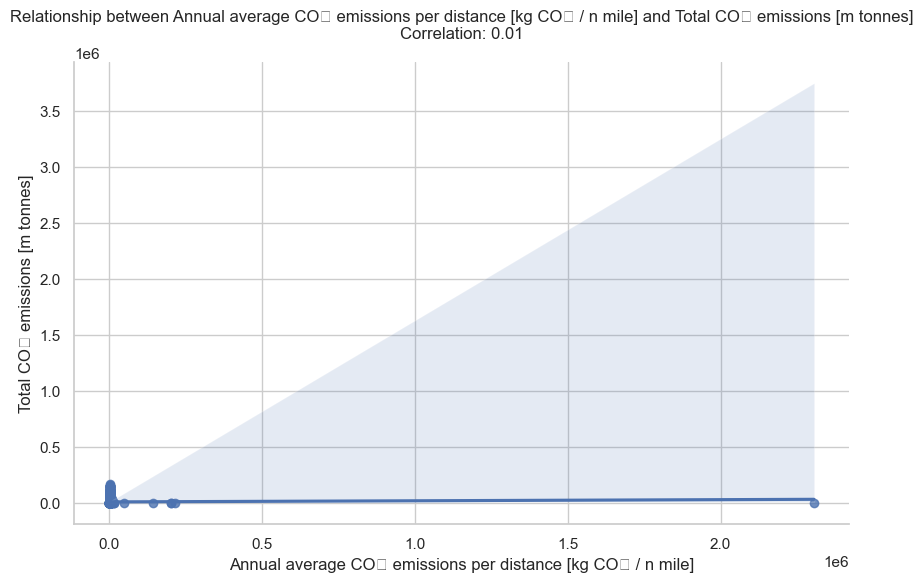

In [426]:
plot_relationship(df, df_cor,x_col=column1,y_col=column2)

In [427]:
df.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,2020,01/07/2021,30/06/2022,414.40,2985.13,31.73
1,EQUALITY,Other ship types,2020,30/06/2021,30/06/2022,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,2020,31/03/2021,30/06/2022,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,2020,16/06/2021,30/06/2022,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,2020,26/04/2021,30/06/2022,274.09,13137.92,9.29


In [460]:
def year_to_last_day(year):
    try:
        year = int(year)
    except (TypeError, ValueError):
        return None

    return datetime.date(year, 12, 31)


def convert_reporting_column(df, column_name, date_conversion_func, date_format):
    df[column_name] = pd.to_datetime(df[column_name].apply(date_conversion_func))
    df[column_name] = df[column_name].dt.strftime('%d/%m/%Y')    
    return df



In [543]:
df_new = df.copy()

In [544]:
df_new = convert_reporting_column(df_new, 'Reporting Period', year_to_last_day, '%d/%m/%Y')

In [545]:
df_new.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,31/12/2020,01/07/2021,30/06/2022,414.40,2985.13,31.73
1,EQUALITY,Other ship types,31/12/2020,30/06/2021,30/06/2022,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,31/12/2020,31/03/2021,30/06/2022,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,31/12/2020,16/06/2021,30/06/2022,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,31/12/2020,26/04/2021,30/06/2022,274.09,13137.92,9.29


In [546]:
df_new.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,31/12/2020,01/07/2021,30/06/2022,414.40,2985.13,31.73
1,EQUALITY,Other ship types,31/12/2020,30/06/2021,30/06/2022,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,31/12/2020,31/03/2021,30/06/2022,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,31/12/2020,16/06/2021,30/06/2022,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,31/12/2020,26/04/2021,30/06/2022,274.09,13137.92,9.29


In [547]:
def filter_by_date_format(df, column_name, date_format_regex):
    df[column_name] = df[column_name].astype(str)
    date_format_mask = df[column_name].str.match(date_format_regex)
    return df[date_format_mask]

In [548]:
df_new = filter_by_date_format(df_new, 'DoC issue date', r'^\d{2}/\d{2}/\d{4}$')

In [549]:
df_new.dtypes

Name                                                            object
Ship type                                                       object
Reporting Period                                                object
DoC issue date                                                  object
DoC expiry date                                                 object
Annual average CO₂ emissions per distance [kg CO₂ / n mile]    float64
Total CO₂ emissions [m tonnes]                                 float64
Technical efficiency                                           float64
dtype: object

In [550]:
df_new.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,31/12/2020,01/07/2021,30/06/2022,414.40,2985.13,31.73
1,EQUALITY,Other ship types,31/12/2020,30/06/2021,30/06/2022,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,31/12/2020,31/03/2021,30/06/2022,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,31/12/2020,16/06/2021,30/06/2022,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,31/12/2020,26/04/2021,30/06/2022,274.09,13137.92,9.29


In [551]:
import pandas as pd

def convert_and_format_date_columns_to_string(df: pd.DataFrame, date_columns: list = None) -> pd.DataFrame:
    """
    Convert date strings in a DataFrame to the format 'YYYY-MM-DD' and store them as strings.

    :param df: The input DataFrame
    :param date_columns: A list of column names to reformat (default: ['Reporting Period', 'DoC issue date', 'DoC expiry date'])
    :return: The modified DataFrame with date columns reformatted as strings
    """
    if date_columns is None:
        date_columns = ['Reporting Period', 'DoC issue date', 'DoC expiry date']

    for col in date_columns:
        if col in df.columns and df[col].dtype == 'object':
            df[col] = pd.to_datetime(df[col], format='%d/%m/%Y', errors='coerce').dt.strftime('%Y-%m-%d').astype(str)
    
    return df




date_cols = ['DoC issue date', 'Reporting Period', 'DoC expiry date']


def convert_to_csv(df, file_path):
    df.to_csv(file_path, index=False)

In [552]:
df_new.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,31/12/2020,01/07/2021,30/06/2022,414.40,2985.13,31.73
1,EQUALITY,Other ship types,31/12/2020,30/06/2021,30/06/2022,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,31/12/2020,31/03/2021,30/06/2022,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,31/12/2020,16/06/2021,30/06/2022,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,31/12/2020,26/04/2021,30/06/2022,274.09,13137.92,9.29


In [553]:
df_new = convert_and_format_date_columns_to_string(df_new, date_cols)

In [554]:
df_new.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,2020-12-31,2021-07-01,2022-06-30,414.40,2985.13,31.73
1,EQUALITY,Other ship types,2020-12-31,2021-06-30,2022-06-30,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,2020-12-31,2021-03-31,2022-06-30,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,2020-12-31,2021-06-16,2022-06-30,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,2020-12-31,2021-04-26,2022-06-30,274.09,13137.92,9.29


In [555]:
df_new.dtypes

Name                                                            object
Ship type                                                       object
Reporting Period                                                object
DoC issue date                                                  object
DoC expiry date                                                 object
Annual average CO₂ emissions per distance [kg CO₂ / n mile]    float64
Total CO₂ emissions [m tonnes]                                 float64
Technical efficiency                                           float64
dtype: object

In [556]:
convert_to_csv(df_new, 'output.csv')

In [474]:
def convert_datetime_to_date(df: pd.DataFrame, date_columns: list = None) -> pd.DataFrame:
    """
    Convert pandas datetime columns in a DataFrame to python date objects.

    :param df: The input DataFrame
    :param date_columns: A list of column names to convert (default: ['Reporting Period', 'DoC issue date', 'DoC expiry date'])
    :return: The modified DataFrame with datetime columns converted to date objects
    """
    if date_columns is None:
        date_columns = ["Reporting Period", "DoC issue date", "DoC expiry date"]

    for col in date_columns:
        if col in df.columns:
            df[col] = df[col].dt.date

    return df

In [475]:
df_new = convert_datetime_to_date(df_new)

/var/folders/_l/g109827s4sv_6p83rwst2h7h0000gp/T/ipykernel_14039/770841464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].dt.date


In [476]:
df_new.dtypes.to_dict()

{'Name': dtype('O'),
 'Ship type': dtype('O'),
 'Reporting Period': dtype('O'),
 'DoC issue date': dtype('O'),
 'DoC expiry date': dtype('O'),
 'Annual average CO₂ emissions per distance [kg CO₂ / n mile]': dtype('float64'),
 'Total CO₂ emissions [m tonnes]': dtype('float64'),
 'Technical efficiency': dtype('float64')}

In [477]:
convert_to_csv(df_new, 'output.csv')

In [531]:
records = df_new.to_dict("records")
records

[{'Name': 'OCEAN MAJESTY',
  'Ship type': 'Passenger ship',
  'Reporting Period': '2020-12-31',
  'DoC issue date': '2021-07-01',
  'DoC expiry date': '2022-06-30',
  'Annual average CO₂ emissions per distance [kg CO₂ / n mile]': 414.4,
  'Total CO₂ emissions [m tonnes]': 2985.13,
  'Technical efficiency': 31.73},
 {'Name': 'EQUALITY',
  'Ship type': 'Other ship types',
  'Reporting Period': '2020-12-31',
  'DoC issue date': '2021-06-30',
  'DoC expiry date': '2022-06-30',
  'Annual average CO₂ emissions per distance [kg CO₂ / n mile]': 127.62,
  'Total CO₂ emissions [m tonnes]': 706.78,
  'Technical efficiency': 57.84},
 {'Name': 'IONIAN STAR',
  'Ship type': 'Ro-pax ship',
  'Reporting Period': '2020-12-31',
  'DoC issue date': '2021-03-31',
  'DoC expiry date': '2022-06-30',
  'Annual average CO₂ emissions per distance [kg CO₂ / n mile]': 333.19,
  'Total CO₂ emissions [m tonnes]': 4947.88,
  'Technical efficiency': 19.4},
 {'Name': 'TALOS',
  'Ship type': 'Ro-ro ship',
  'Reporting

In [463]:
df_new.dtypes

Name                                                            object
Ship type                                                       object
Reporting Period                                                object
DoC issue date                                                  object
DoC expiry date                                                 object
Annual average CO₂ emissions per distance [kg CO₂ / n mile]    float64
Total CO₂ emissions [m tonnes]                                 float64
Technical efficiency                                           float64
dtype: object

In [362]:
import pandas as pd
import datetime
import numpy as np

def cast_ship_columns(df):
    df['Name'] = df['Name'].astype(str)
    df['Ship type'] = df['Ship type'].astype(str)
    df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].astype(float)
    df['Total CO₂ emissions [m tonnes]'] = df['Total CO₂ emissions [m tonnes]'].astype(float)
    df['Technical efficiency'] = df['Technical efficiency'].astype(float)

    return df





In [363]:
df = cast_ship_columns(df)

In [364]:
df.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,2020-12-31,01/07/2021,30/06/2022,414.40,2985.13,31.73
1,EQUALITY,Other ship types,2020-12-31,30/06/2021,30/06/2022,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,2020-12-31,31/03/2021,30/06/2022,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,2020-12-31,16/06/2021,30/06/2022,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,2020-12-31,26/04/2021,30/06/2022,274.09,13137.92,9.29


In [249]:
convert_to_csv(df, 'output.csv')

In [250]:
df.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency


In [209]:
df.dtypes

Name                                                                   object
Ship type                                                              object
Reporting Period                                               datetime64[ns]
DoC issue date                                                 datetime64[ns]
DoC expiry date                                                datetime64[ns]
Annual average CO₂ emissions per distance [kg CO₂ / n mile]           float64
Total CO₂ emissions [m tonnes]                                        float64
Technical efficiency                                                  float64
dtype: object

In [167]:
df.head()

,Name,Ship type,Reporting Period,DoC issue date,DoC expiry date,Annual average CO₂ emissions per distance [kg CO₂ / n mile],Total CO₂ emissions [m tonnes],Technical efficiency
0,OCEAN MAJESTY,Passenger ship,2020-12-31,2021-01-07,2022-06-30,414.40,2985.13,31.73
1,EQUALITY,Other ship types,2020-12-31,2021-06-30,2022-06-30,127.62,706.78,57.84
2,IONIAN STAR,Ro-pax ship,2020-12-31,2021-03-31,2022-06-30,333.19,4947.88,19.40
3,TALOS,Ro-ro ship,2020-12-31,2021-06-16,2022-06-30,206.09,8416.81,48.71
4,SEA WIND,Ro-pax ship,2020-12-31,2021-04-26,2022-06-30,274.09,13137.92,9.29


In [210]:
def convert_to_csv(df, file_path):
    df.to_csv(file_path, index=False)

In [211]:
convert_to_csv(df, 'output.csv')

In [170]:
records =  df.to_dict("records")


In [175]:
df.dtypes.to_dict()

{'Name': dtype('O'),
 'Ship type': dtype('O'),
 'Reporting Period': dtype('<M8[ns]'),
 'DoC issue date': dtype('<M8[ns]'),
 'DoC expiry date': dtype('<M8[ns]'),
 'Annual average CO₂ emissions per distance [kg CO₂ / n mile]': dtype('float64'),
 'Total CO₂ emissions [m tonnes]': dtype('float64'),
 'Technical efficiency': dtype('float64')}

In [176]:
df.dtypes

Name                                                                   object
Ship type                                                              object
Reporting Period                                               datetime64[ns]
DoC issue date                                                 datetime64[ns]
DoC expiry date                                                datetime64[ns]
Annual average CO₂ emissions per distance [kg CO₂ / n mile]           float64
Total CO₂ emissions [m tonnes]                                        float64
Technical efficiency                                                  float64
dtype: object

In [ ]:
Name                                                                   object
Ship type                                                              object
Reporting Period                                               datetime64[ns]
DoC issue date                                                 datetime64[ns]
DoC expiry date                                                datetime64[ns]
Annual average CO₂ emissions per distance [kg CO₂ / n mile]           float64
Total CO₂ emissions [m tonnes]                                        float64
Technical efficiency                                                  float64
dtype: object

In [180]:
import pandas as pd

def cast_ship_columns(df):
    df['Name'] = df['Name'].astype(str)
    df['Ship type'] = df['Ship type'].astype(str)
    
    date_columns = ['Reporting Period', 'DoC issue date', 'DoC expiry date']
    for date_col in date_columns:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce').dt.date
    
    df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'] = df['Annual average CO₂ emissions per distance [kg CO₂ / n mile]'].astype(float)
    df['Total CO₂ emissions [m tonnes]'] = df['Total CO₂ emissions [m tonnes]'].astype(float)
    df['Technical efficiency'] = df['Technical efficiency'].astype(float)
    
    return df


In [178]:
df = cast_ship_columns(df)

In [179]:
convert_to_csv(df, 'output.csv')

In [173]:
df.columns.to_list()

['Name',
 'Ship type',
 'Reporting Period',
 'DoC issue date',
 'DoC expiry date',
 'Annual average CO₂ emissions per distance [kg CO₂ / n mile]',
 'Total CO₂ emissions [m tonnes]',
 'Technical efficiency']